In [2]:
 # Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


In [4]:
 # Load and explore data
df = pd.read_csv('../data/survey_data.csv')
print("📊 Dataset loaded successfully!")
print(f"Shape: {df.shape}")  # (rows, columns)

print("\nFirst 5 rows:")
df.head()

📊 Dataset loaded successfully!
Shape: (3, 10)

First 5 rows:


age  gender  total_income  total_expenses  savings  expense_utilities  \
0   25  Female        3000.0           575.0   2425.0              150.0   
1   35    Male        4500.0           950.0   3550.0              200.0   
2   42  Female        5200.0          1100.0   4100.0              180.0   

   expense_entertainment  expense_school_fees  expense_shopping  \
0                   75.0                200.0             100.0   
1                  150.0                300.0             200.0   
2                  120.0                400.0             250.0   

   expense_healthcare  
0                50.0  
1               100.0  
2               150.0

In [5]:
# Basic information
print("📋 Dataset Info:")
print(df.info())

print("\n📈 Basic Statistics:")
df.describe()

📋 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    3 non-null      int64  
 1   gender                 3 non-null      object 
 2   total_income           3 non-null      float64
 3   total_expenses         3 non-null      float64
 4   savings                3 non-null      float64
 5   expense_utilities      3 non-null      float64
 6   expense_entertainment  3 non-null      float64
 7   expense_school_fees    3 non-null      float64
 8   expense_shopping       3 non-null      float64
 9   expense_healthcare     3 non-null      float64
dtypes: float64(8), int64(1), object(1)
memory usage: 372.0+ bytes
None

📈 Basic Statistics:


age  total_income  total_expenses      savings  \
count   3.000000      3.000000        3.000000     3.000000   
mean   34.000000   4233.333333      875.000000  3358.333333   
std     8.544004   1123.981020      270.416346   853.790568   
min    25.000000   3000.000000      575.000000  2425.000000   
25%    30.000000   3750.000000      762.500000  2987.500000   
50%    35.000000   4500.000000      950.000000  3550.000000   
75%    38.500000   4850.000000     1025.000000  3825.000000   
max    42.000000   5200.000000     1100.000000  4100.000000   

       expense_utilities  expense_entertainment  expense_school_fees  \
count           3.000000               3.000000                  3.0   
mean          176.666667             115.000000                300.0   
std            25.166115              37.749172                100.0   
min           150.000000              75.000000                200.0   
25%           165.000000              97.500000                250.0   
50%           180.000000             120.000000                300.0   
75%           190.000000             135.000000                350.0   
max           200.000000             150.000000                400.0   

       expense_shopping  expense_healthcare  
count          3.000000                 3.0  
mean         183.333333               100.0  
std           76.376262                50.0  
min          100.000000                50.0  
25%          150.000000                75.0  
50%          200.000000               100.0  
75%          225.000000               125.0  
max          250.000000               150.0

In [6]:
 # Check for missing values
print("🔍 Missing Values:")
print(df.isnull().sum())

🔍 Missing Values:
age                      0
gender                   0
total_income             0
total_expenses           0
savings                  0
expense_utilities        0
expense_entertainment    0
expense_school_fees      0
expense_shopping         0
expense_healthcare       0
dtype: int64


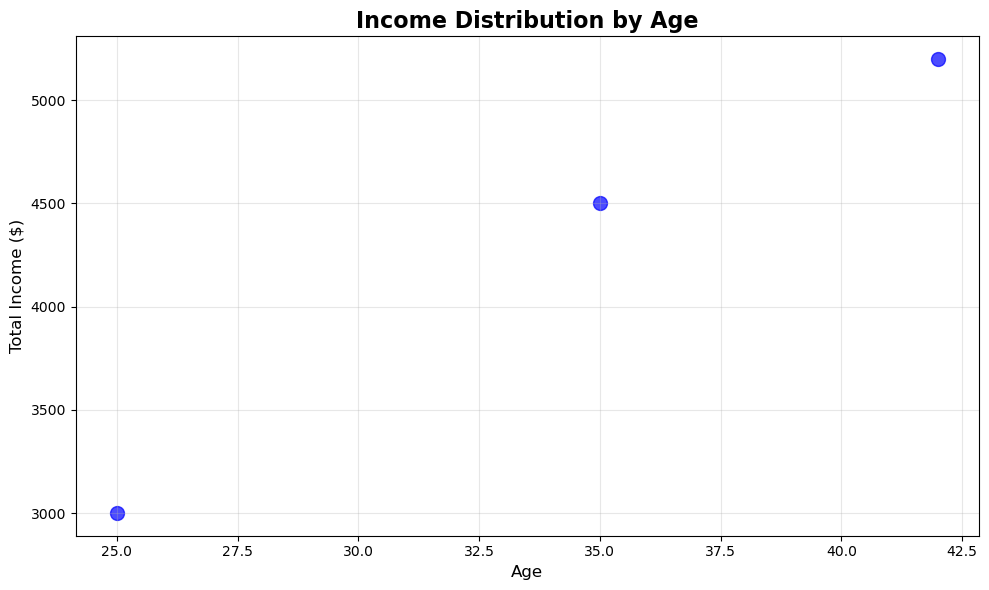

✅ Chart saved as 'charts/income_by_age.png'


In [7]:
# Create our first visualization - Income by Age
plt.figure(figsize=(10, 6))
plt.scatter(df['age'], df['total_income'], alpha=0.7, color='blue', s=100)
plt.title('Income Distribution by Age', fontsize=16, fontweight='bold')
plt.xlabel('Age', fontsize=12)
plt.ylabel('Total Income ($)', fontsize=12)
plt.grid(True, alpha=0.3)

# Add some styling
plt.tight_layout()
plt.savefig('../charts/income_by_age.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Chart saved as 'charts/income_by_age.png'")

C:\Users\HP\AppData\Local\Temp\ipykernel_3088\3724138897.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_by_age = df.groupby('age_group')['total_income'].mean()


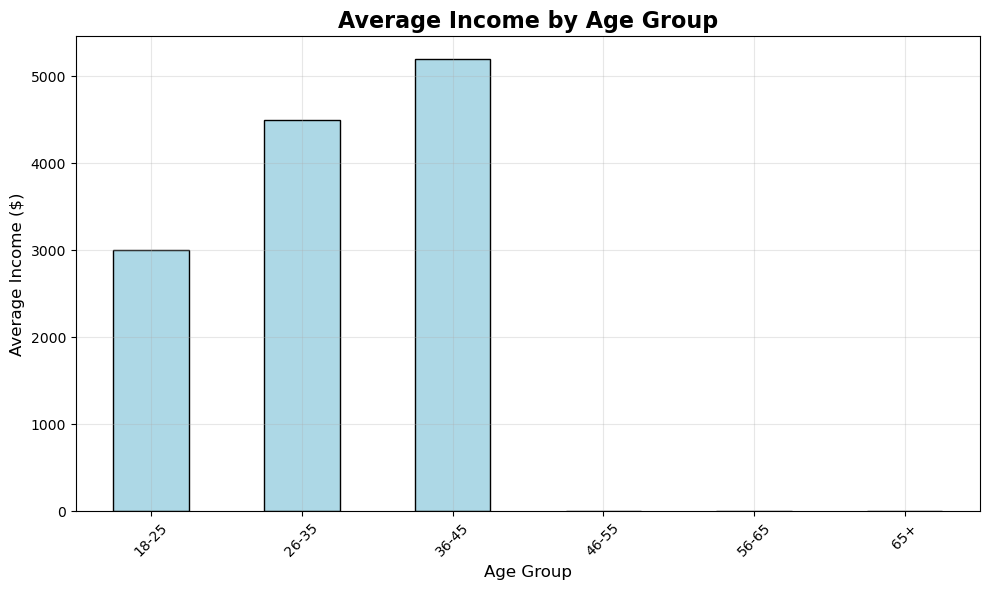

📊 Age groups with highest income:
age_group
36-45    5200.0
26-35    4500.0
18-25    3000.0
46-55       NaN
56-65       NaN
65+         NaN
Name: total_income, dtype: float64


In [8]:
# Create age groups and analyze income
df['age_group'] = pd.cut(df['age'], 
                         bins=[18, 25, 35, 45, 55, 65, 100],
                         labels=['18-25', '26-35', '36-45', '46-55', '56-65', '65+'])

income_by_age = df.groupby('age_group')['total_income'].mean()

plt.figure(figsize=(10, 6))
income_by_age.plot(kind='bar', color='lightblue', edgecolor='black')
plt.title('Average Income by Age Group', fontsize=16, fontweight='bold')
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Average Income ($)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../charts/avg_income_by_age_group.png', dpi=300, bbox_inches='tight')
plt.show()

print("📊 Age groups with highest income:")
print(income_by_age.sort_values(ascending=False))

In [9]:
# Gender distribution across spending categories
# Get all expense columns
expense_columns = [col for col in df.columns if col.startswith('expense_')]
expense_categories = [col.replace('expense_', '') for col in expense_columns]

print("💰 Expense categories found:")
print(expense_categories)


💰 Expense categories found:
['utilities', 'entertainment', 'school_fees', 'shopping', 'healthcare']


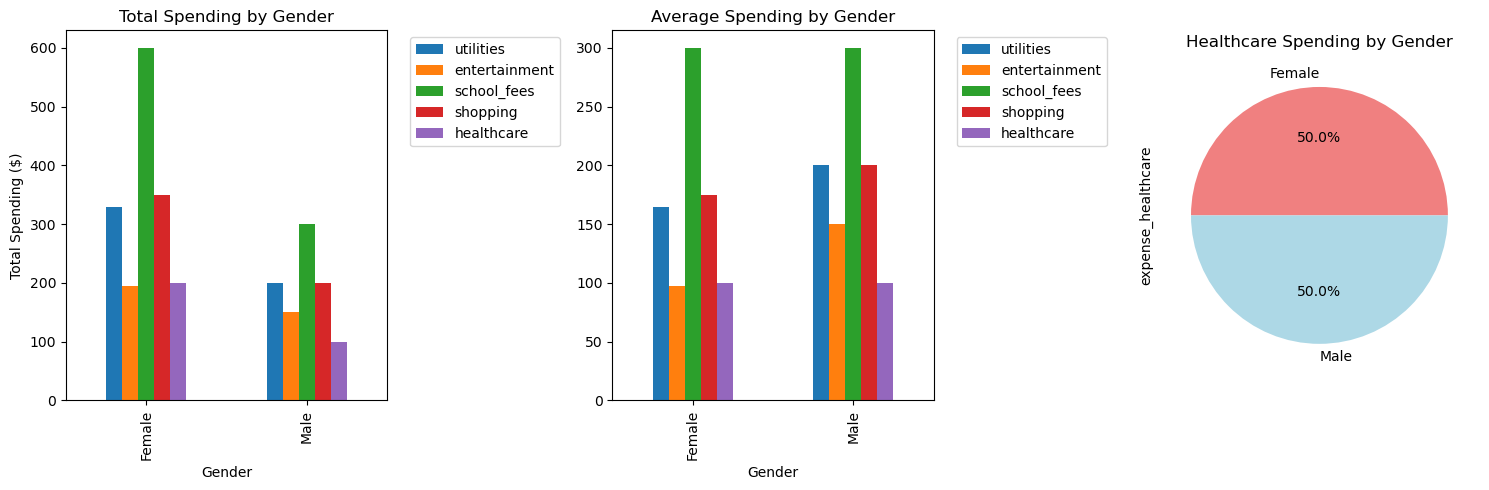

In [10]:
# Gender spending analysis
plt.figure(figsize=(15, 5))

# Plot 1: Total spending by gender
plt.subplot(1, 3, 1)
gender_totals = df.groupby('gender')[expense_columns].sum()
gender_totals.columns = expense_categories
gender_totals.plot(kind='bar', ax=plt.gca())
plt.title('Total Spending by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Spending ($)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Plot 2: Average spending by gender
plt.subplot(1, 3, 2)
gender_avg = df.groupby('gender')[expense_columns].mean()
gender_avg.columns = expense_categories
gender_avg.plot(kind='bar', ax=plt.gca())
plt.title('Average Spending by Gender')
plt.xlabel('Gender')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Plot 3: Healthcare spending specifically
plt.subplot(1, 3, 3)
healthcare_by_gender = df.groupby('gender')['expense_healthcare'].mean()
healthcare_by_gender.plot(kind='pie', autopct='%1.1f%%', colors=['lightcoral', 'lightblue', 'lightgreen'])
plt.title('Healthcare Spending by Gender')

plt.tight_layout()
plt.savefig('../charts/gender_spending_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

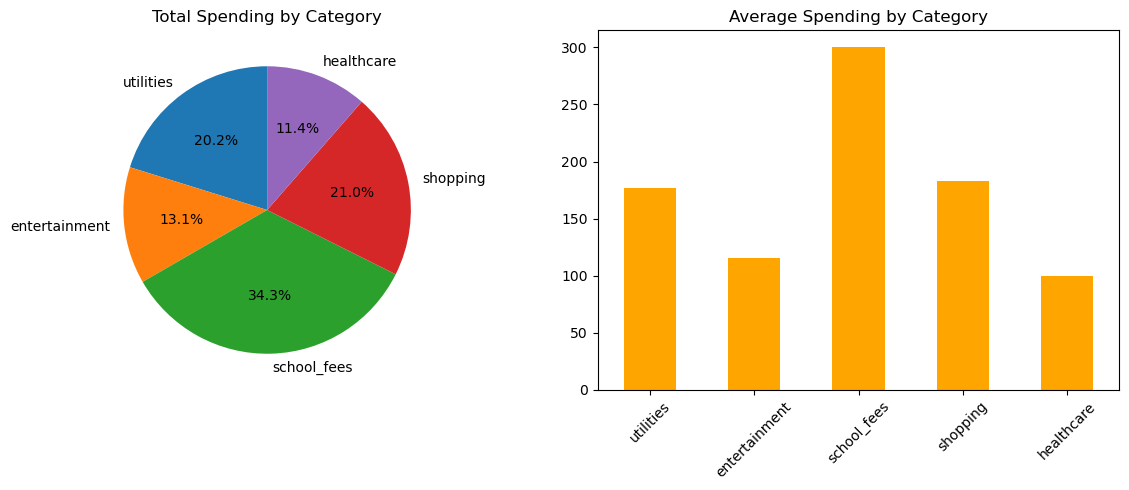

In [11]:
# Expense category analysis
plt.figure(figsize=(12, 5))

# Plot 1: Total spending by category
plt.subplot(1, 2, 1)
total_expenses = df[expense_columns].sum()
total_expenses.index = expense_categories
total_expenses.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Total Spending by Category')

# Plot 2: Average spending by category
plt.subplot(1, 2, 2)
avg_expenses = df[expense_columns].mean()
avg_expenses.index = expense_categories
avg_expenses.plot(kind='bar', color='orange')
plt.title('Average Spending by Category')
plt.xticks(rotation=45)

plt.tight_layout()
plt.savefig('../charts/expense_category_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

In [12]:
# Cell 10: Summary statistics for client presentation
print("🎯 KEY INSIGHTS FOR CLIENT PRESENTATION")
print("=" * 50)

# Demographic insights
print(f"\n1. DEMOGRAPHIC OVERVIEW:")
print(f"   • Total Participants: {len(df)}")
print(f"   • Average Age: {df['age'].mean():.1f} years")
print(f"   • Gender Distribution:")
for gender, count in df['gender'].value_counts().items():
    percentage = (count / len(df)) * 100
    print(f"     - {gender}: {count} participants ({percentage:.1f}%)")

# Income insights
print(f"\n2. INCOME ANALYSIS:")
print(f"   • Average Income: ${df['total_income'].mean():.2f}")
print(f"   • Highest Earning Age Group: {income_by_age.idxmax()} (${income_by_age.max():.2f})")

# Healthcare insights
print(f"\n3. HEALTHCARE SPENDING INSIGHTS:")
print(f"   • Total Healthcare Spending: ${df['expense_healthcare'].sum():.2f}")
print(f"   • Average Healthcare Spending: ${df['expense_healthcare'].mean():.2f}")
print(f"   • Healthcare as % of Total Expenses: {(df['expense_healthcare'].sum() / df[expense_columns].sum().sum()) * 100:.1f}%")

# Gender-based healthcare insights
print(f"   • Healthcare Spending by Gender:")
for gender, amount in healthcare_by_gender.items():
    print(f"     - {gender}: ${amount:.2f}")

print(f"\n4. SAVINGS ANALYSIS:")
print(f"   • Average Savings: ${df['savings'].mean():.2f}")
print(f"   • Participants with Positive Savings: {(df['savings'] > 0).sum()}/{len(df)}")

print(f"\n📈 All charts have been saved in the 'charts' folder for your PowerPoint presentation!")

🎯 KEY INSIGHTS FOR CLIENT PRESENTATION

1. DEMOGRAPHIC OVERVIEW:
   • Total Participants: 3
   • Average Age: 34.0 years
   • Gender Distribution:
     - Female: 2 participants (66.7%)
     - Male: 1 participants (33.3%)

2. INCOME ANALYSIS:
   • Average Income: $4233.33
   • Highest Earning Age Group: 36-45 ($5200.00)

3. HEALTHCARE SPENDING INSIGHTS:
   • Total Healthcare Spending: $300.00
   • Average Healthcare Spending: $100.00
   • Healthcare as % of Total Expenses: 11.4%
   • Healthcare Spending by Gender:
     - Female: $100.00
     - Male: $100.00

4. SAVINGS ANALYSIS:
   • Average Savings: $3358.33
   • Participants with Positive Savings: 3/3

📈 All charts have been saved in the 'charts' folder for your PowerPoint presentation!
